In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("C:\\Users\\tanuj\\Downloads\\hepatitis.csv")
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [70]:
df.isnull().any()


age                False
sex                False
steroid             True
antivirals         False
fatigue             True
malaise             True
anorexia            True
liver_big           True
liver_firm          True
spleen_palpable     True
spiders             True
ascites             True
varices             True
bilirubin           True
alk_phosphate       True
sgot                True
albumin             True
protime             True
histology          False
class              False
dtype: bool

In [71]:
df.isnull().sum()


age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [72]:
df.shape

(155, 20)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [74]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


<AxesSubplot:xlabel='class', ylabel='count'>

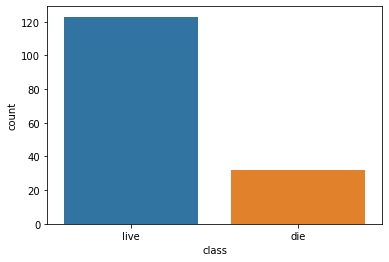

In [75]:
sns.countplot(x='class',data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

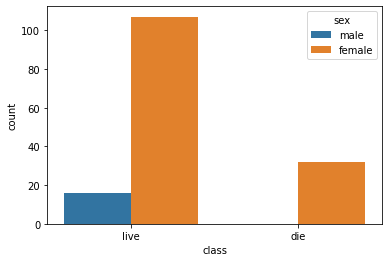

In [76]:
sns.countplot(x='class',hue="sex",data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

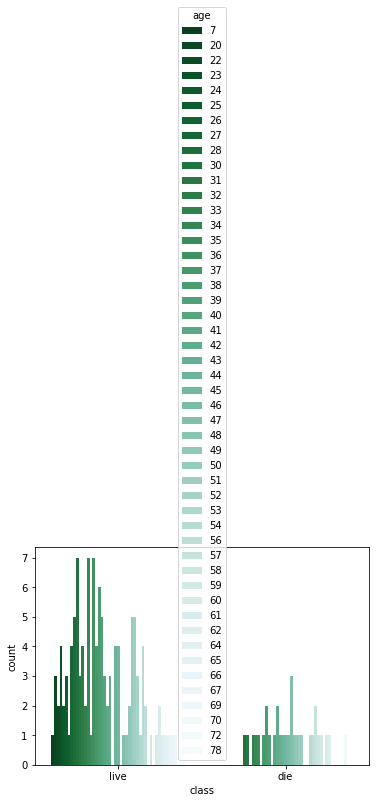

In [77]:
sns.countplot(x='class',hue="age",data=df,palette='BuGn_r')

C:\Users\tanuj\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

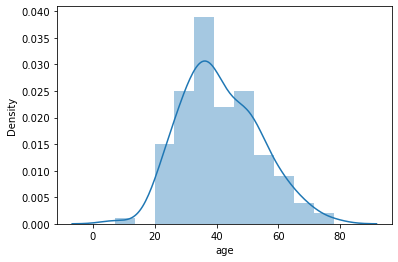

In [78]:
sns.distplot(df['age'].dropna(),kde=True)

<AxesSubplot:>

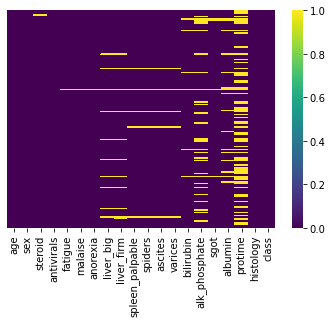

In [79]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

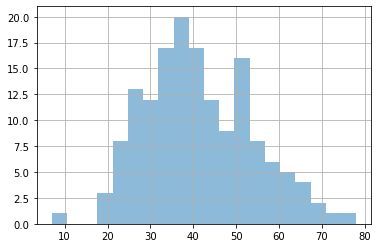

In [80]:
df['age'].hist(alpha=0.5,bins=20)

In [81]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [82]:
con = ['steroid','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices','bilirubin','alk_phosphate','sgot','albumin','protime']
for i in con:
    df[i] = df[i].fillna(df[i].mean())

In [83]:
df.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [84]:

df['sex'] = df['sex'].replace({'female':0,
                              'male':1})
df['class'] = df['class'].replace({'die':0,
                              'live':1})
df.head(155),

(     age  sex   steroid  antivirals fatigue malaise anorexia liver_big  \
 0     30    1     False       False   False   False    False     False   
 1     50    0     False       False    True   False    False     False   
 2     78    0      True       False    True   False    False      True   
 3     31    0  0.506494        True   False   False    False      True   
 4     34    0      True       False   False   False    False      True   
 ..   ...  ...       ...         ...     ...     ...      ...       ...   
 150   46    0      True       False    True    True     True      True   
 151   44    0      True       False    True   False    False      True   
 152   61    0     False       False    True    True    False     False   
 153   53    1     False       False    True   False    False      True   
 154   43    0      True       False    True   False    False      True   
 
     liver_firm spleen_palpable spiders ascites varices  bilirubin  \
 0        False           Fa

In [85]:
df.steroid = df.steroid.astype('int')
df.antivirals = df.antivirals.astype('int')
df.fatigue = df.fatigue.astype('int')
df.malaise = df.malaise.astype('int')
df.anorexia = df.anorexia.astype('int')
df.liver_big = df.liver_big.astype('int')
df.liver_firm = df.liver_firm.astype('int')
df.spiders = df.spiders.astype('int')
df.ascites = df.ascites.astype('int')
df.varices = df.varices.astype('int')
df.spleen_palpable = df.spleen_palpable.astype('int')
df.alk_phosphate = df.alk_phosphate.astype('int')
df.protime = df.protime.astype('int')
df.albumin = df.albumin.astype('int')
df.histology = df.histology.astype('int')
df.head()



,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18.0,4,61,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42.0,3,61,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32.0,4,61,0,1
3,31,0,0,1,0,0,0,1,0,0,0,0,0,0.7,46,52.0,4,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105,200.0,4,61,0,1


In [86]:
df.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [87]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18.0,4,61,0
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42.0,3,61,0
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32.0,4,61,0
3,31,0,0,1,0,0,0,1,0,0,0,0,0,0.7,46,52.0,4,80,0
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105,200.0,4,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,7.6,105,242.0,3,50,1
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126,142.0,4,61,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75,20.0,4,61,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81,19.0,4,48,1


In [88]:
y

0      1
1      1
2      1
3      1
4      1
      ..
150    0
151    1
152    1
153    1
154    0
Name: class, Length: 155, dtype: int64

In [89]:
df1=df.drop(['spleen_palpable','protime'],axis=1)
df1
df1.to_csv("finalhb1.csv")

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)



In [115]:
model1 = LogisticRegression(penalty='l2')
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
acc = accuracy_score(y_pred,y_test)
acc

C:\Users\tanuj\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7659574468085106

In [124]:
model1 = SVC(C=7,gamma='auto',kernel='linear')
#{'C': 7, 'gamma': 'auto', 'kernel': 'linear'}
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
acc = accuracy_score(y_pred,y_test)
acc
#where it showed best 
joblib.dump(model1,"SVCMODEL.pkl")

['SVCMODEL.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(SVC(),
                 {
                     'C':[1,4,5,6,7,8,10],
                     'kernel':['rbf','linear'],
                     'gamma':['auto','scale']
                      
                 },cv=4,return_train_score=True)

gs.fit(X,y)
gs.cv_results_

In [104]:
gs.best_params_

{'C': 7, 'gamma': 'auto', 'kernel': 'linear'}

In [105]:
gs.best_score_


0.8061740890688259

In [117]:
gs.best_estimator_

SVC(C=7, gamma='auto', kernel='linear')

In [121]:
import joblib
filename = 'dtmodel.pkl'
joblib.dump(gs.best_estimator_,filename)
gs.best_score_

['dtmodel.pkl']

In [107]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(C=10,gamma='auto',kernel="linear"),x,y,cv=5)

array([0.80645161, 0.83870968, 0.83870968, 0.83870968, 0.67741935])

In [94]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(),
                 {
                     'C':[1,4,5,6,7,8,10],
                     'kernel':['rbf','linear'],
                     'gamma':['auto','scale']
                      
                 },cv=4,return_train_score=True,n_iter=4)

rs.fit(x,y)
rs.cv_results_

{'mean_fit_time': array([0.00319707, 0.70520961, 1.10711032, 0.00390655]),
 'std_fit_time': array([0.00098293, 0.52314196, 0.60387276, 0.00676634]),
 'mean_score_time': array([0.0027352 , 0.00415641, 0.        , 0.00390571]),
 'std_score_time': array([0.00069631, 0.00663372, 0.        , 0.00676489]),
 'param_kernel': masked_array(data=['rbf', 'linear', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['auto', 'scale', 'scale', 'auto'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[4, 4, 7, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'gamma': 'auto', 'C': 4},
  {'kernel': 'linear', 'gamma': 'scale', 'C': 4},
  {'kernel': 'linear', 'gamma': 'scale', 'C': 7},
  {'kernel': 'rbf', 'gamma': 'auto', 'C': 5}],
 'split

In [95]:
rs.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 7}

In [96]:
rs.best_score_

0.8061740890688259

In [ ]:
import pickle
import joblib
joblib.dump(grid)

In [97]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
acc = accuracy_score(y_pred,y_test)
acc

0.7021276595744681

In [98]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
acc = accuracy_score(y_pred,y_test)
acc

0.7872340425531915

In [99]:
model1 = AdaBoostClassifier()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
acc = accuracy_score(y_pred,y_test)
acc

0.7659574468085106

In [100]:
model1 = XGBClassifier()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
acc = accuracy_score(y_pred,y_test)
acc

[17:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\tanuj\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7659574468085106

In [101]:
model1 = GradientBoostingClassifier()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
acc = accuracy_score(y_pred,y_test)
acc

0.7446808510638298

In [102]:
#KNN
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
acc

0.6808510638297872

In [122]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
acc

0.7659574468085106

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    int64  
 2   steroid          155 non-null    int32  
 3   antivirals       155 non-null    int32  
 4   fatigue          155 non-null    int32  
 5   malaise          155 non-null    int32  
 6   anorexia         155 non-null    int32  
 7   liver_big        155 non-null    int32  
 8   liver_firm       155 non-null    int32  
 9   spleen_palpable  155 non-null    int32  
 10  spiders          155 non-null    int32  
 11  ascites          155 non-null    int32  
 12  varices          155 non-null    int32  
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    int32  
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    int32  
 17  protime         

In [138]:
df[df.columns[19]].values

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0], dtype=int64)